# 1b. Comparing theoretical and simulated P($\theta$, t)
We simulate $10^3$ trajectories of $\theta(t)$ using Euler's numerical scheme and compare the histogram of $\theta$ values with the theoretical distribution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D_r = 0.17  # Rotational diffusion coefficient (rad^2/s)
omega = 10  # Angular velocity (rad/s)
dt = 0.01  # Time step (s)
T = 5  # Total time (s)
time_steps = np.linspace(0, T, int(T / dt) + 1)  # Time steps
N = len(time_steps)  # Number of time steps
num_trajectories = 1000  # Number of trajectories

# Initial theta
theta = np.zeros((num_trajectories, N))

# Euler-Maruyama simulation for theta(t)
for i in range(num_trajectories):
    for j in range(1, N):
        dW = np.sqrt(dt) * np.random.normal()  # Wiener increment
        theta[i, j] = theta[i, j-1] + omega * dt + np.sqrt(2 * D_r) * dW

# Theoretical distribution
def theoretical_distribution(theta, t):
    return (1 / np.sqrt(4 * np.pi * D_r * t)) * np.exp(-(theta - omega * t)**2 / (4 * D_r * t))

### t = 1s.

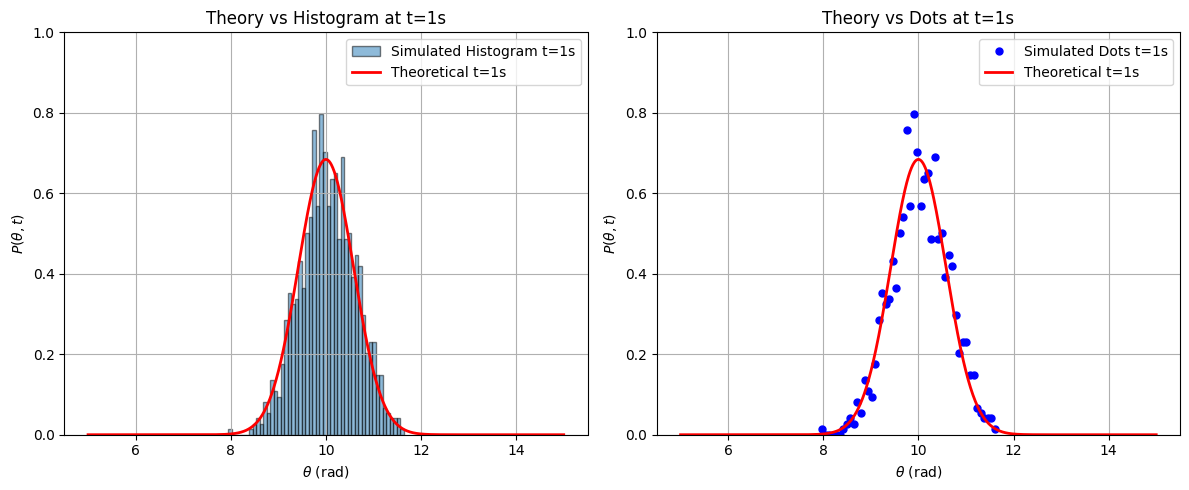

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
timesteps = 1000   # Total number of time steps
dt = 0.01         # Time step
time = np.arange(0, timesteps*dt, dt)
N = 1000          # Number of simulations

# Physical parameters
Dr = 0.17  # Rotational diffusion coefficient (rad^2/s)
Dt = 0.2   # Translational diffusion coefficient (µm^2/s)
v = 30     # Self-propulsion speed (µm/s)
omega = 10 # Angular velocity (rad/s)

# (b) Simulating theta(t) using Euler-Maruyama method
np.random.seed(42)  # For reproducibility
theta = np.zeros((N, timesteps))
for i in range(N):
    for t in range(1, timesteps):
        theta[i, t] = theta[i, t-1] + omega * dt + np.sqrt(2 * Dr * dt) * np.random.randn()

# Extract values at t = 1s and t = 5s
index_t1 = int(1/dt)
index_t5 = int(5/dt)
theta_t1 = theta[:, index_t1]
theta_t5 = theta[:, index_t5]

# Theoretical probability density function
def theoretical_p(theta_values, t):
    return (1 / np.sqrt(4 * np.pi * Dr * t)) * np.exp(-((theta_values - omega * t)**2) / (4 * Dr * t))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot results for t = 1s
t = 1
idx = np.argmin(np.abs(time - t))  # Find the index closest to time t
theta_t = theta[:, idx]  # Simulated theta values at time t

# Histogram of simulated theta (normalized)
hist, bin_edges = np.histogram(theta_t, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Center of bins

# Subplot 1: Theory vs Histogram
axes[0].hist(theta_t, bins=50, density=True, alpha=0.5, label=f'Simulated Histogram t={t}s', edgecolor='black')
theta_range = np.linspace(5, 15, 1000)  # Adjusted range around the expected mean (10 rad)
P_theta = theoretical_p(theta_range, t)
axes[0].plot(theta_range, P_theta, 'r-', label=f'Theoretical t={t}s', linewidth=2)
axes[0].set_xlabel(r'$\theta$ (rad)')
axes[0].set_ylabel(r'$P(\theta, t)$')
axes[0].legend()
axes[0].set_title(f'Theory vs Histogram at t={t}s')
axes[0].grid(True)
axes[0].set_ylim(0, 1)

# Subplot 2: Theory vs Dots
axes[1].plot(bin_centers, hist, 'bo', label=f'Simulated Dots t={t}s', markersize=5)
axes[1].plot(theta_range, P_theta, 'r-', label=f'Theoretical t={t}s', linewidth=2)
axes[1].set_xlabel(r'$\theta$ (rad)')
axes[1].set_ylabel(r'$P(\theta, t)$')
axes[1].legend()
axes[1].set_title(f'Theory vs Dots at t={t}s')
axes[1].grid(True)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### t = 5s.

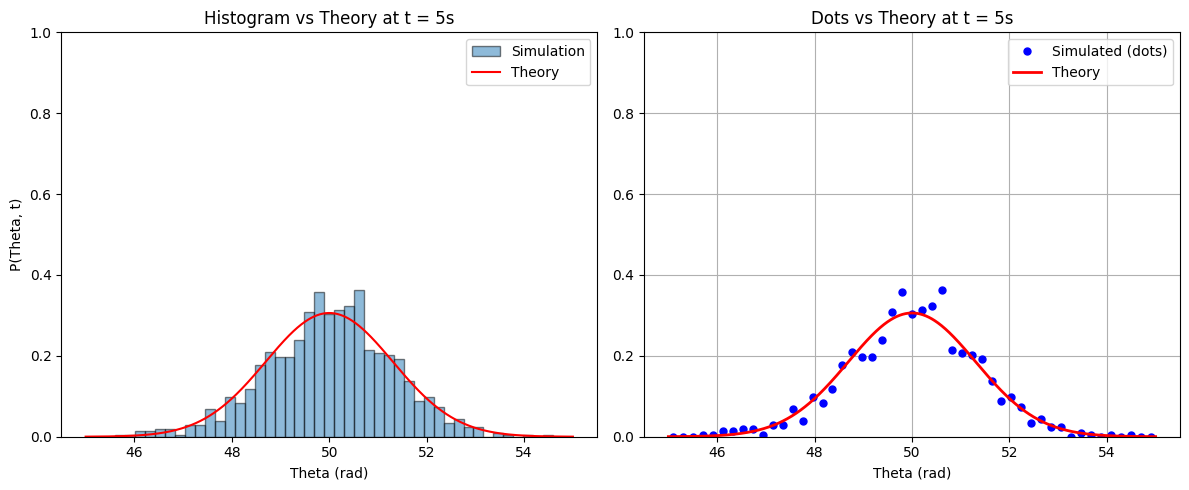

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
timesteps = 1000   # Total number of time steps
dt = 0.01         # Time step
time = np.arange(0, timesteps*dt, dt)
N = 1000          # Number of simulations

# Physical parameters
Dr = 0.17  # Rotational diffusion coefficient (rad^2/s)
Dt = 0.2   # Translational diffusion coefficient (µm^2/s)
v = 30     # Self-propulsion speed (µm/s)
omega = 10 # Angular velocity (rad/s)

# (b) Simulating theta(t) using Euler-Maruyama method
np.random.seed(42)  # For reproducibility
theta = np.zeros((N, timesteps))
for i in range(N):
    for t in range(1, timesteps):
        theta[i, t] = theta[i, t-1] + omega * dt + np.sqrt(2 * Dr * dt) * np.random.randn()

# Extract values at t = 5s
index_t5 = int(5/dt)
theta_t5 = theta[:, index_t5]

# Theoretical probability density function
def theoretical_p(theta_values, t):
    return (1 / np.sqrt(4 * np.pi * Dr * t)) * np.exp(-((theta_values - omega * t)**2) / (4 * Dr * t))

# Plot probability distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for t = 5s
theta_bins = np.linspace(45, 55, 50)
hist, bin_edges = np.histogram(theta_t5, bins=theta_bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

axes[0].hist(theta_t5, bins=theta_bins, density=True, alpha=0.5, label='Simulation', edgecolor='black')
theta_range = np.linspace(45, 55, 1000)
axes[0].plot(theta_range, theoretical_p(theta_range, 5), 'r-', label='Theory')
axes[0].set_title("Histogram vs Theory at t = 5s")
axes[0].set_xlabel("Theta (rad)")
axes[0].set_ylabel("P(Theta, t)")
axes[0].set_ylim(0, 1)
axes[0].legend()

# Dots vs Theory for t = 5s
axes[1].plot(bin_centers, hist, 'bo', label='Simulated (dots)', markersize=5)
axes[1].plot(theta_range, theoretical_p(theta_range, 5), 'r-', label='Theory', linewidth=2)
axes[1].set_title("Dots vs Theory at t = 5s")
axes[1].set_xlabel("Theta (rad)")
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

###

###

# 1d. Numerical simulation with $\omega=10$

We simulate five stochastic trajectories each for $x(t)$, $y(t)$, $x(t)$ vs $y(t)$, $r(t)$ and $dr(t)$ using the given parameters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D_t = 0.2  # Translational diffusion coefficient (µm^2/s)
D_r = 0.17  # Rotational diffusion coefficient (rad^2/s)
v = 30  # Self-propulsion speed (µm/s)
omega = 10  # Angular velocity (rad/s)
dt = 0.01  # Time step (s)
T = 10  # Total time (s)
N = int(T / dt)  # Number of time steps
num_trajectories = 5  # Number of trajectories

# Initialize arrays
x = np.zeros((num_trajectories, N))
y = np.zeros((num_trajectories, N))
theta = np.zeros((num_trajectories, N))

# Euler-Maruyama simulation
for i in range(num_trajectories):  # Loop over trajectories
    for j in range(1, N):  # Loop over time steps
        # Wiener increments (random noise)
        dW_theta = np.sqrt(dt) * np.random.normal()  # Noise for theta
        dW_x = np.sqrt(dt) * np.random.normal()  # Noise for x
        dW_y = np.sqrt(dt) * np.random.normal()  # Noise for y

        # Update theta
        theta[i, j] = theta[i, j-1] + omega * dt + np.sqrt(2 * D_r) * dW_theta

        # Update x and y
        x[i, j] = x[i, j-1] + v * np.cos(theta[i, j]) * dt + np.sqrt(2 * D_t) * dW_x
        y[i, j] = y[i, j-1] + v * np.sin(theta[i, j]) * dt + np.sqrt(2 * D_t) * dW_y

# Time array
time = np.arange(0, T, dt)

## The horizontal position \(x(t)\) of the particle as a function of time

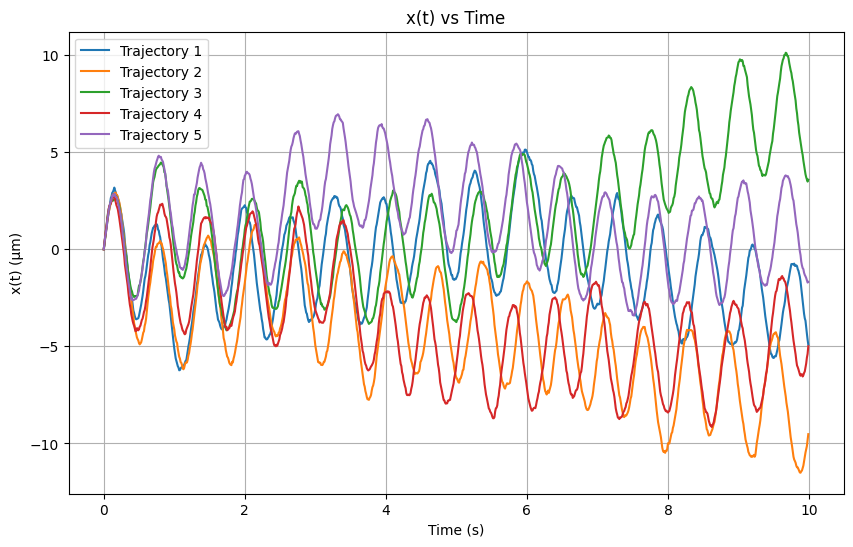

In [ ]:
# Plot x(t) vs time
plt.figure(figsize=(10, 6))
for i in range(num_trajectories):
    plt.plot(time, x[i], label=f'Trajectory {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('x(t) (µm)')
plt.title('x(t) vs Time')
plt.legend()
plt.grid()
plt.savefig('x_vs_time.png')  # Save the plot
plt.show()


## The vertical position \(y(t)\) of the particle as a function of time

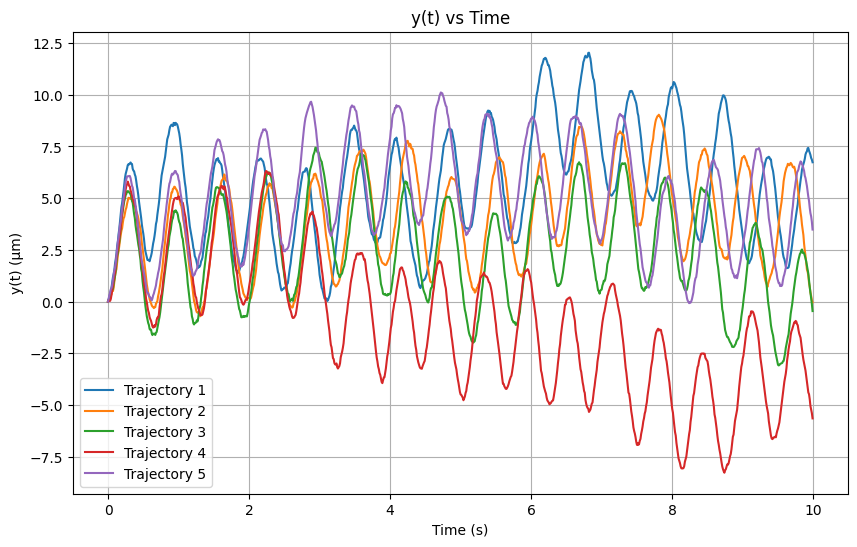

In [ ]:
# Plot y(t) vs time
plt.figure(figsize=(10, 6))
for i in range(num_trajectories):
    plt.plot(time, y[i], label=f'Trajectory {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('y(t) (µm)')
plt.title('y(t) vs Time')
plt.legend()
plt.grid()
plt.savefig('y_vs_time.png')  # Save the plot
plt.show()

## The 2D trajectory of the particle in the \(xy\)-plane.

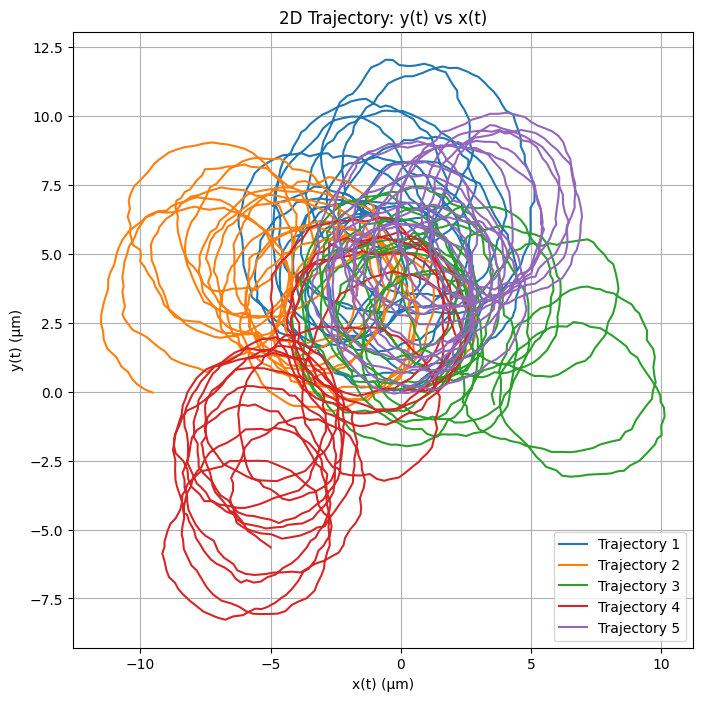

In [ ]:
# Plot y(t) vs x(t) (2D trajectory)
plt.figure(figsize=(8, 8))
for i in range(num_trajectories):
    plt.plot(x[i], y[i], label=f'Trajectory {i+1}')
plt.xlabel('x(t) (µm)')
plt.ylabel('y(t) (µm)')
plt.title('2D Trajectory: y(t) vs x(t)')
plt.legend()
plt.grid()
plt.savefig('y_vs_x.png')  # Save the plot
plt.show()


## The distance $r(t) = \sqrt{x^2(t) + y^2(t)}$ from the origin as a function of time

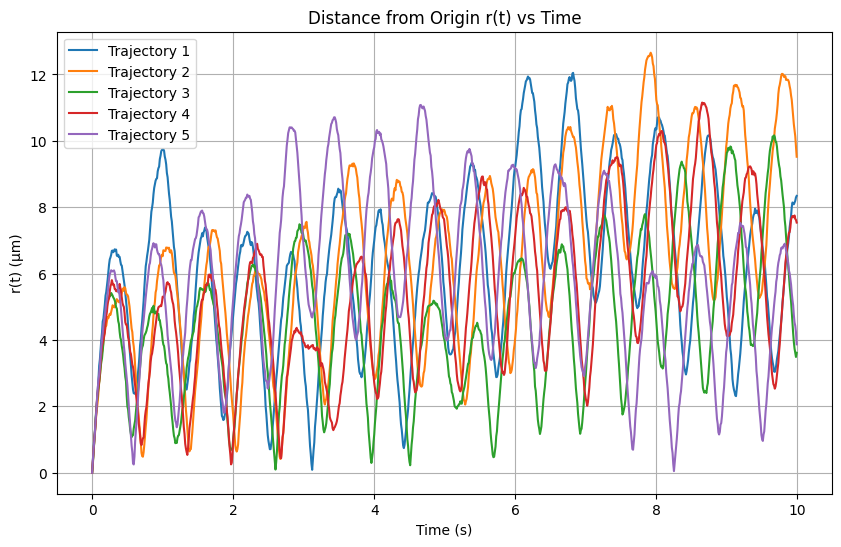

In [ ]:
# Compute r(t) and dr(t)
r = np.sqrt(x**2 + y**2)  # Distance from origin
# Plot r(t) vs time
plt.figure(figsize=(10, 6))
for i in range(num_trajectories):
    plt.plot(time, r[i], label=f'Trajectory {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('r(t) (µm)')
plt.title('Distance from Origin r(t) vs Time')
plt.legend()
plt.grid()
plt.savefig('r_vs_time.png')  # Save the plot
plt.show()


## The change in distance $dr(t) = r(t + \Delta t) - r(t)$ as a function of time

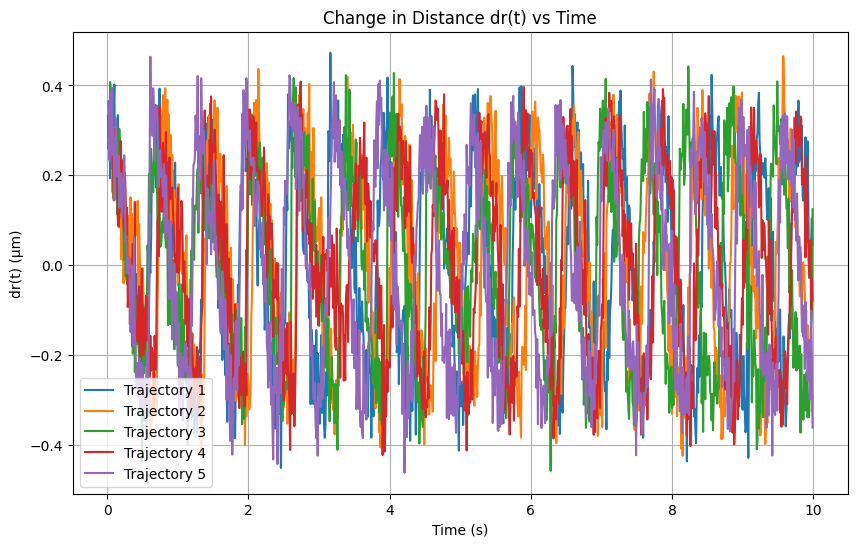

In [ ]:
# Compute dr(t)
dr = np.diff(r, axis=1)  # Change in distance (dr/dt)
# Plot dr(t) vs time
plt.figure(figsize=(10, 6))
for i in range(num_trajectories):
    plt.plot(time[1:], dr[i], label=f'Trajectory {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('dr(t) (µm)')
plt.title('Change in Distance dr(t) vs Time')
plt.legend()
plt.grid()
plt.savefig('dr_vs_time.png')  # Save the plot
plt.show()

# 1e. Numerical simulation with  𝜔=0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D_t = 0.2  # Translational diffusion coefficient (µm^2/s)
D_r = 0.17  # Rotational diffusion coefficient (rad^2/s)
v = 30  # Self-propulsion speed (µm/s)
omega = 0  # Angular velocity (rad/s) - set to 0 for non-chiral motion
dt = 0.01  # Time step (s)
T = 10  # Total time (s)
N = int(T / dt)  # Number of time steps
num_trajectories = 5  # Number of trajectories

# Initialize arrays
x = np.zeros((num_trajectories, N))
y = np.zeros((num_trajectories, N))
theta = np.zeros((num_trajectories, N))

# Euler-Maruyama simulation
for i in range(num_trajectories):  # Loop over trajectories
    for j in range(1, N):  # Loop over time steps
        # Wiener increments (random noise)
        dW_theta = np.sqrt(dt) * np.random.normal()  # Noise for theta
        dW_x = np.sqrt(dt) * np.random.normal()  # Noise for x
        dW_y = np.sqrt(dt) * np.random.normal()  # Noise for y

        # Update theta (no angular velocity, only rotational diffusion)
        theta[i, j] = theta[i, j-1] + omega * dt + np.sqrt(2 * D_r) * dW_theta

        # Update x and y
        x[i, j] = x[i, j-1] + v * np.cos(theta[i, j]) * dt + np.sqrt(2 * D_t) * dW_x
        y[i, j] = y[i, j-1] + v * np.sin(theta[i, j]) * dt + np.sqrt(2 * D_t) * dW_y

# Time array
time = np.arange(0, T, dt)

## The horizontal position \(x(t)\) of the particle as a function of time

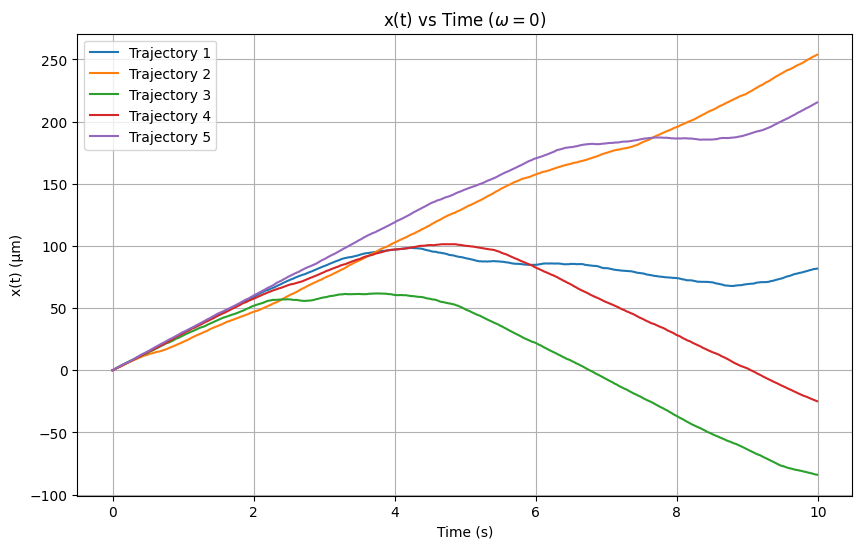

In [ ]:
# Plot x(t) vs time
plt.figure(figsize=(10, 6))
for i in range(num_trajectories):
    plt.plot(time, x[i], label=f'Trajectory {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('x(t) (µm)')
plt.title('x(t) vs Time ($\omega = 0$)')
plt.legend()
plt.grid()
plt.savefig('x_vs_time_omega0.png')  # Save the plot
plt.show()

## The vertical position \(y(t)\) of the particle as a function of time

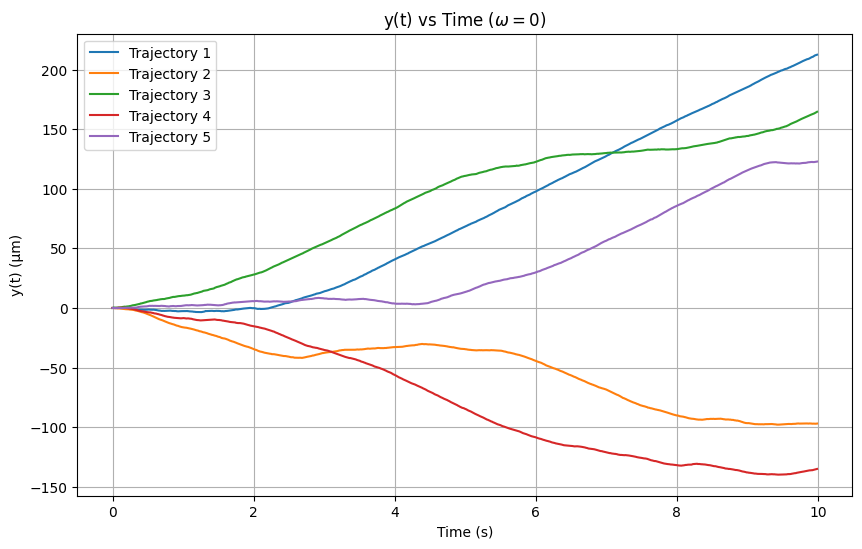

In [ ]:
# Plot y(t) vs time
plt.figure(figsize=(10, 6))
for i in range(num_trajectories):
    plt.plot(time, y[i], label=f'Trajectory {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('y(t) (µm)')
plt.title('y(t) vs Time ($\omega = 0$)')
plt.legend()
plt.grid()
plt.savefig('y_vs_time_omega0.png')  # Save the plot
plt.show()

## The 2D trajectory of the particle in the \(xy\)-plane.

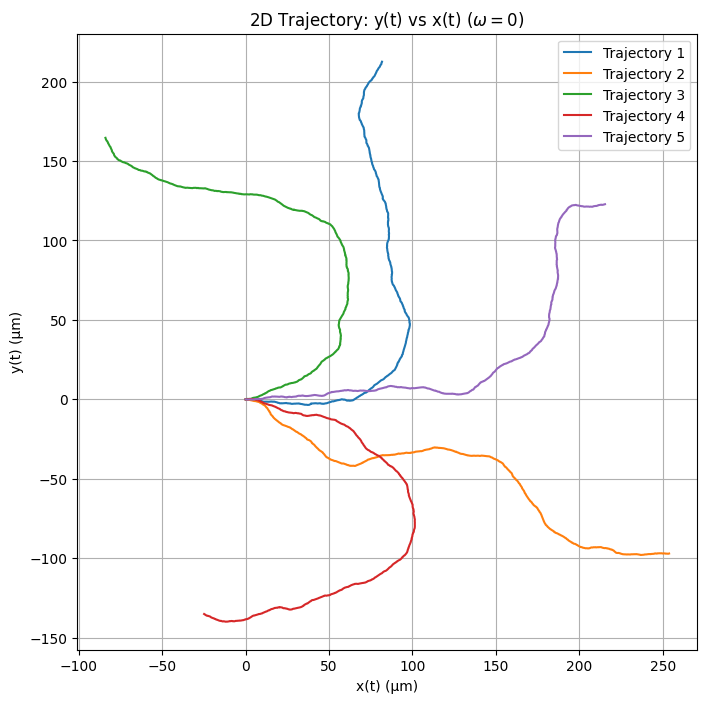

In [ ]:
# Plot y(t) vs x(t) (2D trajectory)
plt.figure(figsize=(8, 8))
for i in range(num_trajectories):
    plt.plot(x[i], y[i], label=f'Trajectory {i+1}')
plt.xlabel('x(t) (µm)')
plt.ylabel('y(t) (µm)')
plt.title('2D Trajectory: y(t) vs x(t) ($\omega = 0$)')
plt.legend()
plt.grid()
plt.savefig('y_vs_x_omega0.png')  # Save the plot
plt.show()

## The distance $r(t) = \sqrt{x^2(t) + y^2(t)}$ from the origin as a function of time

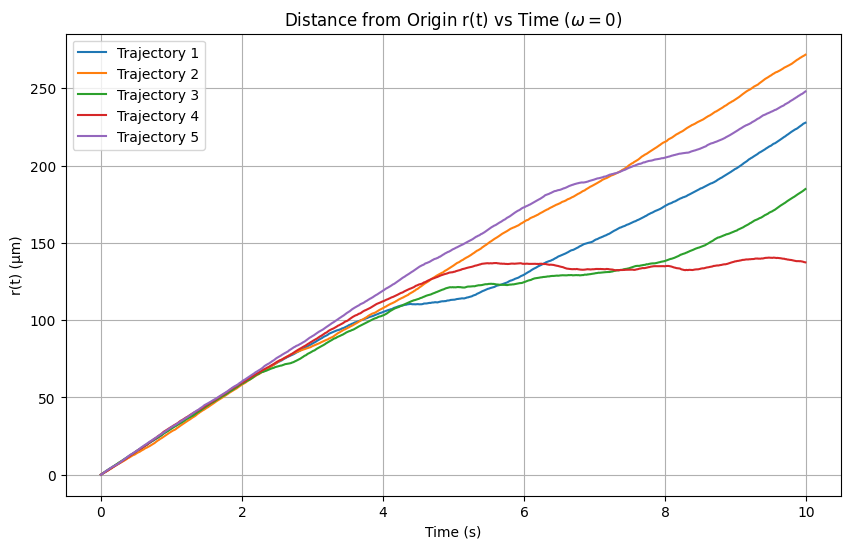

In [ ]:

# Compute r(t)
r = np.sqrt(x**2 + y**2)  # Distance from origin

# Plot r(t) vs time
plt.figure(figsize=(10, 6))
for i in range(num_trajectories):
    plt.plot(time, r[i], label=f'Trajectory {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('r(t) (µm)')
plt.title('Distance from Origin r(t) vs Time ($\omega = 0$)')
plt.legend()
plt.grid()
plt.savefig('r_vs_time_omega0.png')  # Save the plot
plt.show()

## The change in distance $dr(t)$ as a function of time for $\omega=0$

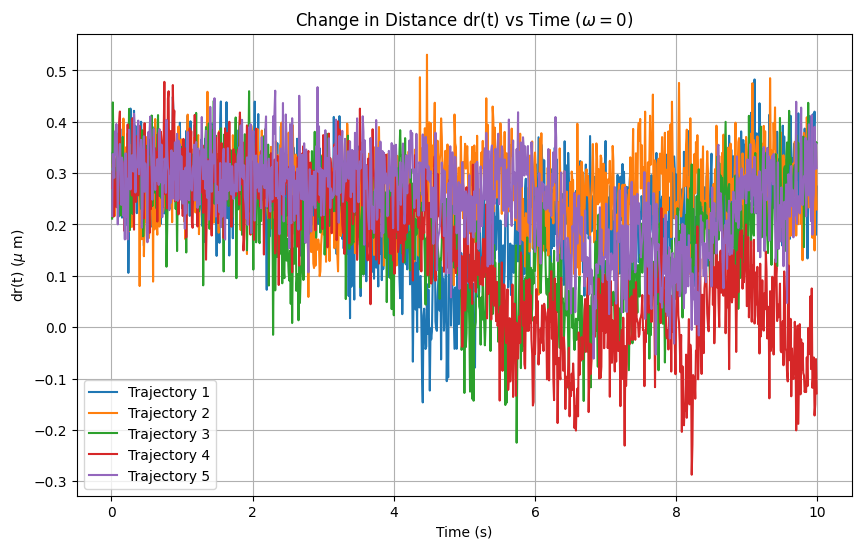

In [ ]:
# Compute dr(t)
dr = np.diff(r, axis=1)  # Change in distance (dr/dt)

# Plot dr(t) vs time
plt.figure(figsize=(10, 6))
for i in range(num_trajectories):
    plt.plot(time[1:], dr[i], label=f'Trajectory {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('dr(t) ($\mu$ m)')
plt.title('Change in Distance dr(t) vs Time ($\omega = 0$)')
plt.legend()
plt.grid()
plt.savefig('dr_vs_time_omega0.png')  # Save the plot
plt.show()

# Run and tumble motion

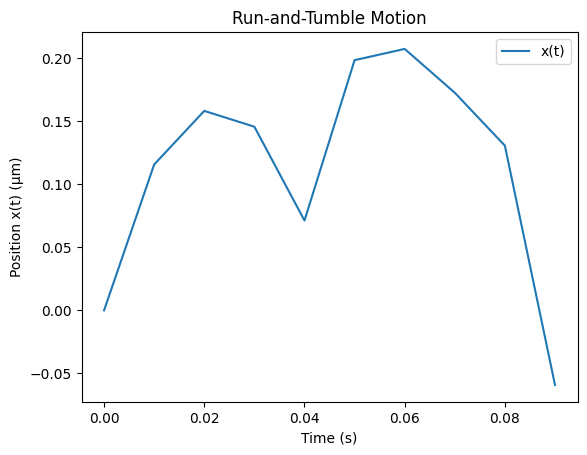

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
v_plus = 2  # Velocity in + state (µm/s)
v_minus = 2  # Velocity in - state (µm/s)
k_plus = 0.5  # Rate of switching from + to - (1/s)
k_minus = 0.5  # Rate of switching from - to + (1/s)
D = 0.25  # Diffusion coefficient (µm^2/s)
dt = 0.01  # Time step (s)
T = 0.1  # Total time (s)
N = int(T / dt)  # Number of time steps

# Initialize arrays
x = np.zeros(N)
sigma = np.zeros(N, dtype=int)  # +1 or -1
sigma[0] = 1  # Start in + state

# Euler-Maruyama simulation
for i in range(1, N):
    # Update state
    if sigma[i-1] == 1:
        if np.random.rand() < k_plus * dt:
            sigma[i] = -1
        else:
            sigma[i] = 1
    else:
        if np.random.rand() < k_minus * dt:
            sigma[i] = 1
        else:
            sigma[i] = -1

    # Update position
    if sigma[i] == 1:
        x[i] = x[i-1] + v_plus * dt + np.sqrt(2 * D * dt) * np.random.normal()
    else:
        x[i] = x[i-1] - v_minus * dt + np.sqrt(2 * D * dt) * np.random.normal()

# Plot trajectory
time = np.arange(0, T, dt)
plt.plot(time, x, label='x(t)')
plt.xlabel('Time (s)')
plt.ylabel('Position x(t) (µm)')
plt.title('Run-and-Tumble Motion')
plt.legend()
plt.show()